In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat       # Import function to read data.
data = loadmat('Ch3_d1.mat')
d = data['d']
print(d)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]


In [3]:
np.shape(d)

(1000, 500)

object d contains 1000 rows, 500 columns

In [4]:
n_trials = np.shape(d)[0]
T = np.shape(d)[1]
print(n_trials)
print(T)

1000
500


Above code breaks it up by taking the first entries in 1000 to 0 and entries in 500 to 1

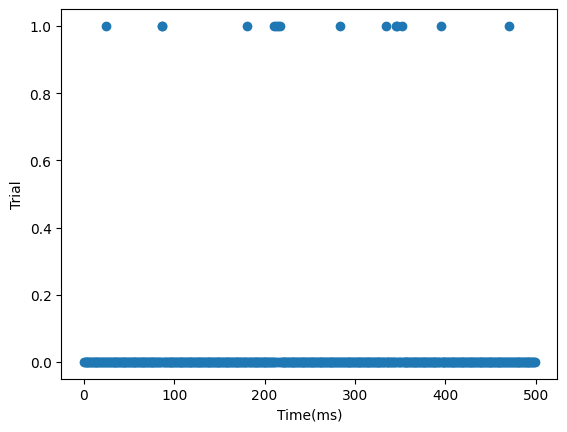

In [5]:
#PLOT THE RESULTS FROM THE FIRST TRIAL 
#this is a line trying to connect the dots, so make sure each plot shows each thing as an dot
plt.plot(d[0,0:500], 'o')
plt.xlabel("Time(ms)")
plt.ylabel("Trial")
plt.show()

In this chart we see values of 0 and 1, 1 indicates a "spike". Attempting to count the dots by hand, it seems that there are 11 "spikes". 

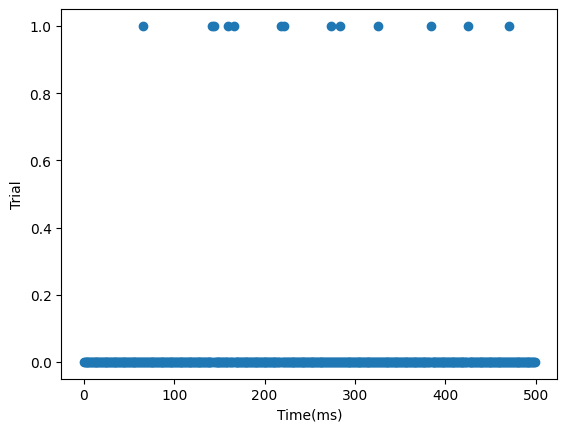

In [6]:
#Plot the second trial
plt.plot(d[1,:], 'o')
plt.xlabel("Time(ms)")
plt.ylabel("Trial")
plt.show()

In this chart, it is still 0s and 1s (so it still looks like spiking data). There are about 13 dots counting by hand. 

In [7]:
#lets define a variable that takes the number of spikes per trial. what python function can do this?
#sum up all the entries that =1. 
n_spikes_per_trial = np.sum(d,1) #this tells the pc to 
print(n_spikes_per_trial[0:2]) #this prints out the number of spikes counted in the first trial and the second trial 
#check the shape of n_spikes_per_trial variable
np.shape(n_spikes_per_trial)
#its [1000,1] ---> the number of trials

[15 13]


(1000,)

In [8]:
#Compute the average number of spikes per trial 
n_avg = np.mean(n_spikes_per_trial)
print (n_avg)

12.344


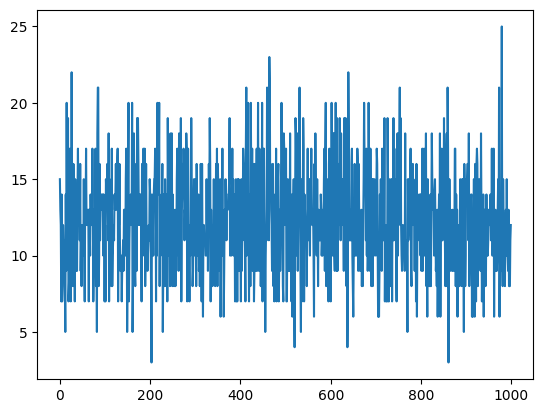

In [9]:
plt.plot(n_spikes_per_trial);

HISTROGRAMS

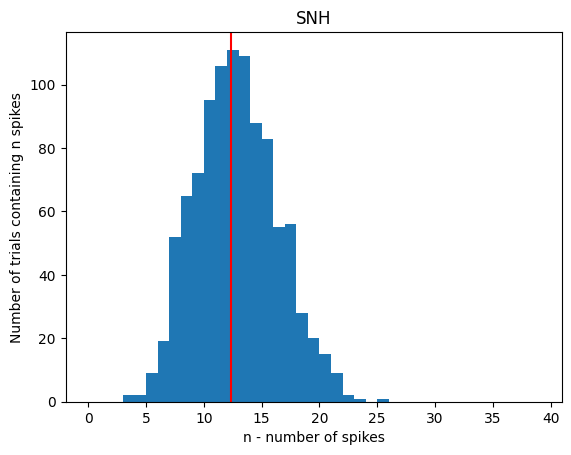

In [13]:
plt.hist(n_spikes_per_trial, np.arange(40))
plt.xlabel('n - number of spikes')
plt.ylabel('Number of trials containing n spikes')
plt.title('SNH');
plt.axvline(n_avg, color='r');

n_avg = average number of spikes looks consistent with this histogram that we made to check the n_avg

plot it with the histogram (in red?)

In [10]:
#Compute the average firing rate for these data 
#the avearging firing rate is equal to the average number of spikes per trial divided by duration of trials 
avg_firing_rate = n_avg / T
print(avg_firing_rate)

0.024687999999999998


In [31]:
ISI = [];                                   #Empty variable to hold ISIs
for k in range (n_trials):                  #For each trial:
    spike_times = np.where(d[k,:] == 1);    #................ find indices where spikes occur
    isi0 = np.diff(spike_times);            #................ get the difference between indices (ISIs) 
    ISI = np.concatenate([ISI, isi0[0]]);   #................ and append this to list of all ISIs. 

In [37]:
#HOW DO WE CHECK THIS ABOVE CODE? Let's see what's happening in one instance of the loop ;) 
k=1;    
spike_times = np.where(d[k,:] == 1)
print(spike_times)
isi0 = np.diff(spike_times);    
print(isi0)

(array([ 66, 142, 144, 160, 166, 218, 221, 273, 283, 326, 384, 425, 470],
      dtype=int64),)
[[76  2 16  6 52  3 52 10 43 58 41 45]]


In [32]:
np.shape(ISI)

(11344,)

we have about 12 spikes per trial, so how many ISIs would you have? 11 x 1000 roughtly about 11,000 .... so this is probably accurate. The code above represents the number of ISIs from all trials. 

In [34]:
mean_ISI = np.mean(ISI)
print(mean_ISI)
#This is the mean ISI in miliseconds (the average interval between spikes in miliseconds)

36.952485895627646


Text(0.5, 1.0, 'The ISI Histogram <3')

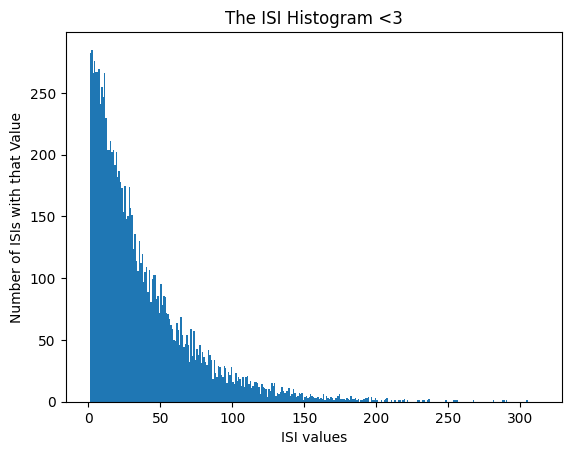

In [43]:
#Is the mean ISI useful? How can we answer this question? Is the mean ISI representative of our data or leading us astray? 
#perhaps we should look at an individual ISI by histogramming it
plt.hist(ISI, np.arange(np.max(ISI))); #q to self: the semicolon made the computation dissappear... why? (using np.max  to make histogram that fits all of the um ISIs)
#kramer likes specifying bins because it forces him to think about the data... not a bad idea 
plt.xlabel('ISI values')
plt.ylabel('Number of ISIs with that Value')
plt.title('The ISI Histogram <3')

What is the distribution of this? It's a left skew. Is this even a neuron? Are neurons normally distributed like this? This has a funny shape. 

This is left skew, don't think its normal at all 

In [44]:
#THE PSTH
prob_spike = np.sum(d,0)/n_trials; #this will give us the probabiliy of a spike at any moment in time
print(prob_spike)

[0.023 0.031 0.026 0.023 0.022 0.034 0.029 0.025 0.019 0.035 0.026 0.024
 0.023 0.02  0.027 0.022 0.03  0.033 0.023 0.019 0.026 0.027 0.022 0.033
 0.025 0.025 0.032 0.03  0.016 0.018 0.027 0.024 0.029 0.028 0.018 0.025
 0.032 0.023 0.024 0.025 0.03  0.02  0.026 0.029 0.027 0.025 0.023 0.025
 0.015 0.021 0.023 0.035 0.028 0.024 0.019 0.014 0.03  0.028 0.025 0.019
 0.013 0.027 0.024 0.027 0.022 0.027 0.021 0.016 0.017 0.026 0.022 0.031
 0.025 0.026 0.021 0.023 0.019 0.026 0.035 0.027 0.023 0.023 0.027 0.027
 0.023 0.023 0.029 0.023 0.023 0.019 0.015 0.02  0.028 0.019 0.038 0.025
 0.029 0.015 0.018 0.031 0.022 0.03  0.022 0.028 0.024 0.017 0.028 0.034
 0.027 0.021 0.021 0.021 0.032 0.027 0.022 0.022 0.024 0.021 0.024 0.031
 0.023 0.03  0.02  0.027 0.026 0.027 0.027 0.029 0.025 0.027 0.026 0.028
 0.026 0.026 0.031 0.018 0.025 0.024 0.022 0.028 0.019 0.024 0.025 0.028
 0.025 0.022 0.033 0.028 0.029 0.021 0.02  0.028 0.022 0.023 0.024 0.031
 0.028 0.016 0.028 0.025 0.017 0.025 0.022 0.03  0.

Text(0.5, 1.0, 'PSTH')

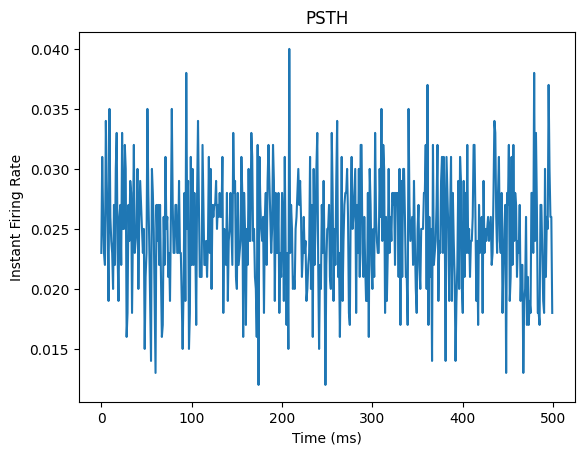

In [47]:
#PSTH
#TO GET THE INSTANT FFIRING RATE we MUST: 
dt = 00.1 #this is the uhhh time between samples in [s] == 1 ms
instant_firing_rate = prob_spike/dt
plt.plot(prob_spike)
#what is the firing rate approximately? what should the axes be?
plt.xlabel('Time (ms)')
plt.ylabel('Instant Firing Rate')
plt.title('PSTH')

Does the firing rate change over time? Is the firing rate different at the different time intervals? Not really. There's a lot of noise (fluxes)... Perhaps a constant firing rate throughout the interval 

In [48]:
#THE FANO
fano = np.var(n_spikes_per_trial)/ np.mean(n_spikes_per_trial)
print(fano)

1.0066156837329878


Looks like a poisson distribution
Can you rule out that this data was generated? 

A fano factor of near 1... implies.... something fishy. 

Challenges: Analze another dataset and compute all of these things we did and apply all of these skills that we learned to this new dataset and make comparisons between this dataset and the other one. Code from class will be posted on onenote (good cause I lost the first histo)